# Import Libraries

In [98]:
# data manipulation library
import pandas as pd
import numpy as np

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# modelling library
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# Load Data

In [99]:
df = pd.read_csv('/kaggle/input/uci-credit-card/UCI_Credit_Card.csv')

# Check Data

### Glimppse of data

In [100]:
# check number of rows and columns
df.shape

(29899, 25)

In [101]:
# # first 5 rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [102]:
# check the data type and number of rows for each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29899 entries, 0 to 29898
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         29899 non-null  int64  
 1   LIMIT_BAL  29899 non-null  float64
 2   SEX        29899 non-null  int64  
 3   EDUCATION  29899 non-null  int64  
 4   MARRIAGE   29899 non-null  int64  
 5   AGE        29899 non-null  int64  
 6   PAY_0      29899 non-null  int64  
 7   PAY_2      29899 non-null  int64  
 8   PAY_3      29899 non-null  int64  
 9   PAY_4      29899 non-null  int64  
 10  PAY_5      29899 non-null  int64  
 11  PAY_6      29899 non-null  int64  
 12  BILL_AMT1  29899 non-null  float64
 13  BILL_AMT2  29899 non-null  float64
 14  BILL_AMT3  29899 non-null  float64
 15  BILL_AMT4  29899 non-null  float64
 16  BILL_AMT5  29899 non-null  float64
 17  BILL_AMT6  29899 non-null  float64
 18  PAY_AMT1   29899 non-null  float64
 19  PAY_AMT2   29899 non-null  float64
 20  PAY_AM

All the category variables have been encoded in integers

Target Variable: default.payment.next.month

Category Variable: 'SEX', 'EDUCATION', 'MARRIAGE'

Numerical Variable: 'ID','AGE', 'LIMIT_BAL','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'

Pay_0 looks inconsistent naming. We will correct it later

In [103]:
# check the distribution of numerical variables
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000,...,29899.000000,29899.000000,29899.000000,29899.000000,2.989900e+04,29899.000000,29899.000000,29899.000000,29899.000000,29899.000000
mean,14950.000000,167464.787451,1.605773,1.853005,1.551824,35.483193,-0.016656,-0.133984,-0.166226,-0.220375,...,43265.240443,40341.307134,38889.279106,5644.602896,5.907426e+03,5206.395599,4826.210475,4781.576708,5214.493027,0.221078
std,8631.242186,129740.606959,0.488692,0.790119,0.521991,9.227704,1.123632,1.197156,1.196912,1.169479,...,64336.825267,60832.326498,59573.389304,16443.639381,2.299487e+04,17478.019265,15626.314656,15160.802205,17757.152939,0.414980
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7475.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.500000,1772.500000,1261.000000,1000.000000,8.360000e+02,390.000000,299.000000,257.000000,122.000000,0.000000
50%,14950.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18121.000000,17104.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22424.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54544.500000,50219.500000,49205.500000,5006.000000,5.000000e+03,4502.500000,4014.500000,4031.000000,4000.000000,0.000000
max,29899.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Total record: 30000

Marriage and Education have undefined data

Standard Deviation is quite large for Limit_bal, Bill_Amt and Pay_Amt


In [104]:
df['SEX'].value_counts()

2    18112
1    11787
Name: SEX, dtype: int64

In [105]:
df['EDUCATION'].value_counts()

2    13988
1    10548
3     4897
5      278
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [106]:
df['MARRIAGE'].value_counts()

2    15909
1    13614
3      322
0       54
Name: MARRIAGE, dtype: int64

Education undefined data 0 and Marriage undefined data 0. Let's check what it is

In [107]:
df[df['EDUCATION']==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
3769,3770,290000.0,2,0,2,38,1,-1,-1,-1,...,1406.0,2196.0,1481.0,1437.0,3078.0,1406.0,2196.0,1481.0,0.0,0
5945,5946,270000.0,1,0,2,39,1,-1,-1,-1,...,18607.0,0.0,0.0,10193.0,70213.0,19008.0,399.0,0.0,0.0,0
6876,6877,360000.0,1,0,2,30,0,0,-1,0,...,34345.0,36777.0,30.0,23000.0,12280.0,25007.0,25008.0,1767.0,3300.0,0
14631,14632,350000.0,2,0,2,53,-1,-1,-1,-1,...,22611.0,1385.0,6043.0,4840.0,61349.0,22687.0,1389.0,6058.0,1153.0,0
15107,15108,210000.0,1,0,2,45,-2,-2,-2,-2,...,788.0,3499.0,3372.0,5854.0,1032.0,788.0,3565.0,3372.0,15381.0,0
16881,16882,100000.0,1,0,2,37,0,0,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16896,16897,200000.0,1,0,2,40,1,-2,-1,-1,...,1000.0,0.0,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,0
17414,17415,230000.0,2,0,2,47,-1,-1,-1,2,...,255.0,5425.0,4838.0,5743.0,1598.0,0.0,5425.0,4838.0,3840.0,0
19920,19921,50000.0,2,0,1,40,0,0,0,0,...,47647.0,40500.0,41921.0,2229.0,2298.0,2100.0,2500.0,1921.0,8432.0,0
20030,20031,200000.0,2,0,2,30,-1,-1,2,-1,...,9470.0,5816.0,7809.0,2880.0,0.0,9470.0,5834.0,7809.0,2886.0,0


In [108]:
df[df['MARRIAGE']==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
218,219,110000.0,2,3,0,31,0,0,0,0,...,73315.0,63818.0,63208.0,4000.0,5000.0,3000.0,3000.0,3000.0,8954.0,0
809,810,160000.0,2,2,0,37,0,0,0,0,...,28574.0,27268.0,28021.0,35888.0,1325.0,891.0,1000.0,1098.0,426.0,0
820,821,200000.0,2,3,0,51,-1,-1,-1,-1,...,780.0,390.0,390.0,0.0,390.0,780.0,0.0,390.0,390.0,0
1019,1020,180000.0,2,3,0,45,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1443,1444,200000.0,1,3,0,51,-1,-1,-1,-1,...,2529.0,1036.0,4430.0,5020.0,9236.0,2529.0,0.0,4430.0,6398.0,0
2146,2147,150000.0,2,3,0,55,-1,-1,-1,-1,...,2939.0,3396.0,1870.0,17498.0,9160.0,2939.0,3396.0,1870.0,6800.0,0
2554,2555,220000.0,2,1,0,33,-1,-1,-1,-1,...,608.0,1738.0,277.0,1531.0,942.0,608.0,1738.0,277.0,492.0,0
3056,3057,200000.0,1,3,0,36,-2,-2,-2,-2,...,41359.0,9140.0,0.0,89187.0,14178.0,41359.0,9140.0,0.0,0.0,0
4470,4471,70000.0,1,3,0,35,2,2,2,2,...,50517.0,51658.0,52758.0,2200.0,1900.0,2000.0,2100.0,2100.0,2000.0,0
5005,5006,90000.0,2,3,0,24,-2,-2,-2,-1,...,13574.0,6800.0,1830.0,20108.0,4000.0,13574.0,14.0,5.0,13162.0,0


The undefined data looks correct and should also be included into the model. We will group the undefined and unknown into 'Others' category

## **Check Missing Data**

In [109]:
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

No missing value in this dataset

## Check Cardinality

High cardinality for category variable may impact the model performance. Hence, we need to check for category variable

In [110]:
# check unique
df.nunique()

ID           29899
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22652
BILL_AMT2    22282
BILL_AMT3    21961
BILL_AMT4    21486
BILL_AMT5    20957
BILL_AMT6    20555
PAY_AMT1      7925
PAY_AMT2      7878
PAY_AMT3      7504
PAY_AMT4      6927
PAY_AMT5      6878
PAY_AMT6      6930
Y                2
dtype: int64

In [111]:
# Check Cardinality
for col_name in df.columns:
  num = df[col_name].nunique()
  percentage = num / df.shape[0] *100
  print('%s, %d, %.1f%%' % (col_name, num, percentage))

ID, 29899, 100.0%
LIMIT_BAL, 81, 0.3%
SEX, 2, 0.0%
EDUCATION, 7, 0.0%
MARRIAGE, 4, 0.0%
AGE, 56, 0.2%
PAY_0, 11, 0.0%
PAY_2, 11, 0.0%
PAY_3, 11, 0.0%
PAY_4, 11, 0.0%
PAY_5, 10, 0.0%
PAY_6, 10, 0.0%
BILL_AMT1, 22652, 75.8%
BILL_AMT2, 22282, 74.5%
BILL_AMT3, 21961, 73.5%
BILL_AMT4, 21486, 71.9%
BILL_AMT5, 20957, 70.1%
BILL_AMT6, 20555, 68.7%
PAY_AMT1, 7925, 26.5%
PAY_AMT2, 7878, 26.3%
PAY_AMT3, 7504, 25.1%
PAY_AMT4, 6927, 23.2%
PAY_AMT5, 6878, 23.0%
PAY_AMT6, 6930, 23.2%
Y, 2, 0.0%


No cardinality issue. 



Numerical Variable: Limit_Bal shows low cardinality which means that we may convert it to ordinal data

## Check Duplicate Data

In [112]:
dups = df.duplicated()
print(dups.any())
print(df[dups])

False
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, Y]
Index: []

[0 rows x 25 columns]


No Duplicated Data found

Now we can confirm the dataset is clean

## Check Data Balance

In [113]:
print(len(df[df['Y']==1]))
print(len(df[df['Y']==0])) 

6610
23289


Unbalance label. We will do resample later for modelling

# Exploratory Data Analysis

## Histogram

In [114]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y'],
      dtype='object')

In [115]:
client_background = list(df.columns[1:6])
pay = list(df.columns[6:12])
bill_amt = list(df.columns[12:18])
pay_amt = list(df.columns[18:24])

In [116]:
def draw_histograms(df, variables, n_rows, n_cols, bin_size):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[df["Y"]==1][var_name].plot.hist(color='red', label='Default', alpha=0.7, density=True, ax=ax, bins=bin_size)
        df[df["Y"]==0][var_name].plot.hist(color='blue', label='Not Default', alpha=0.7, density=True, ax=ax, bins=bin_size)
        ax.set_title(var_name)
        ax.set_ylabel('Probability')
    fig.tight_layout()

    fig.legend(['Default', 'Not Default'], loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

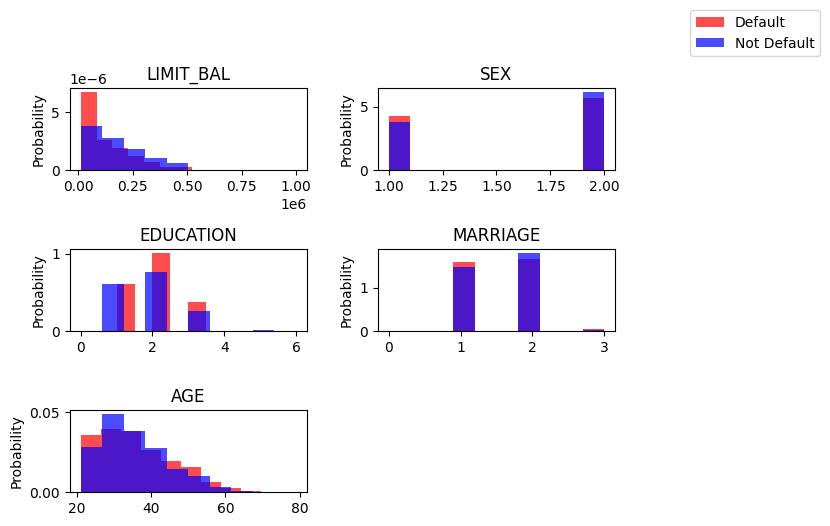

In [117]:
draw_histograms(df,client_background, 3,2,10)

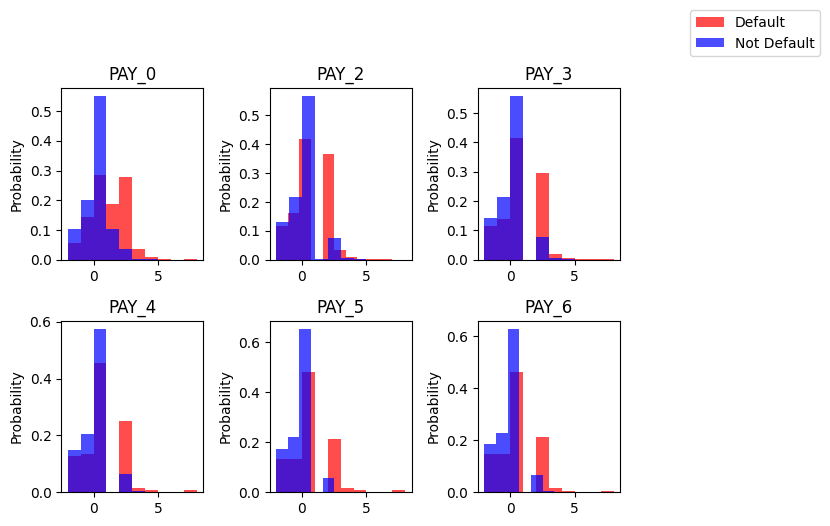

In [118]:
draw_histograms(df,pay, 2,3,10)

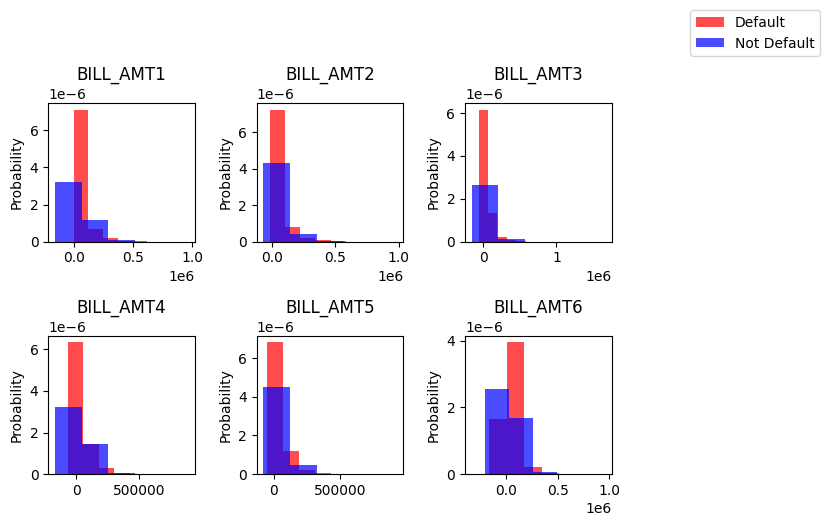

In [119]:
draw_histograms(df,bill_amt, 2,3,5)

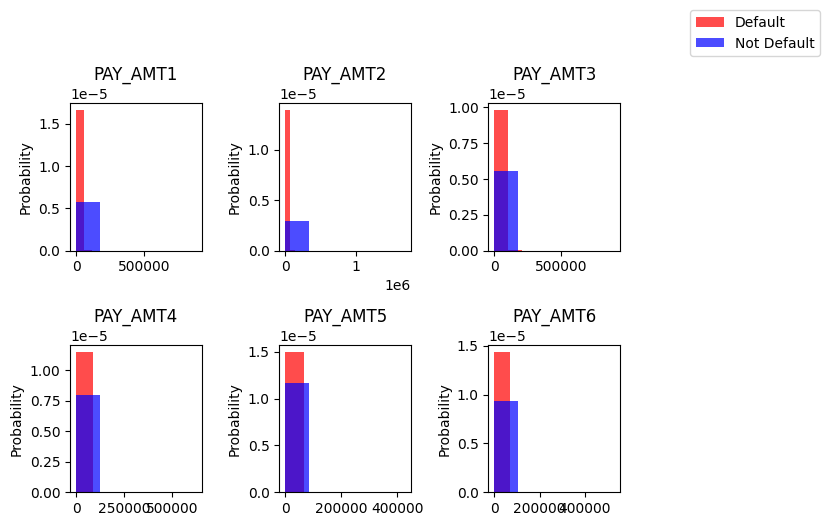

In [120]:
draw_histograms(df,pay_amt, 2,3,5)

Age is right-skewed

Clients who have delay payment in the latest month tends to have default payment next month.


## Correlation Analysis

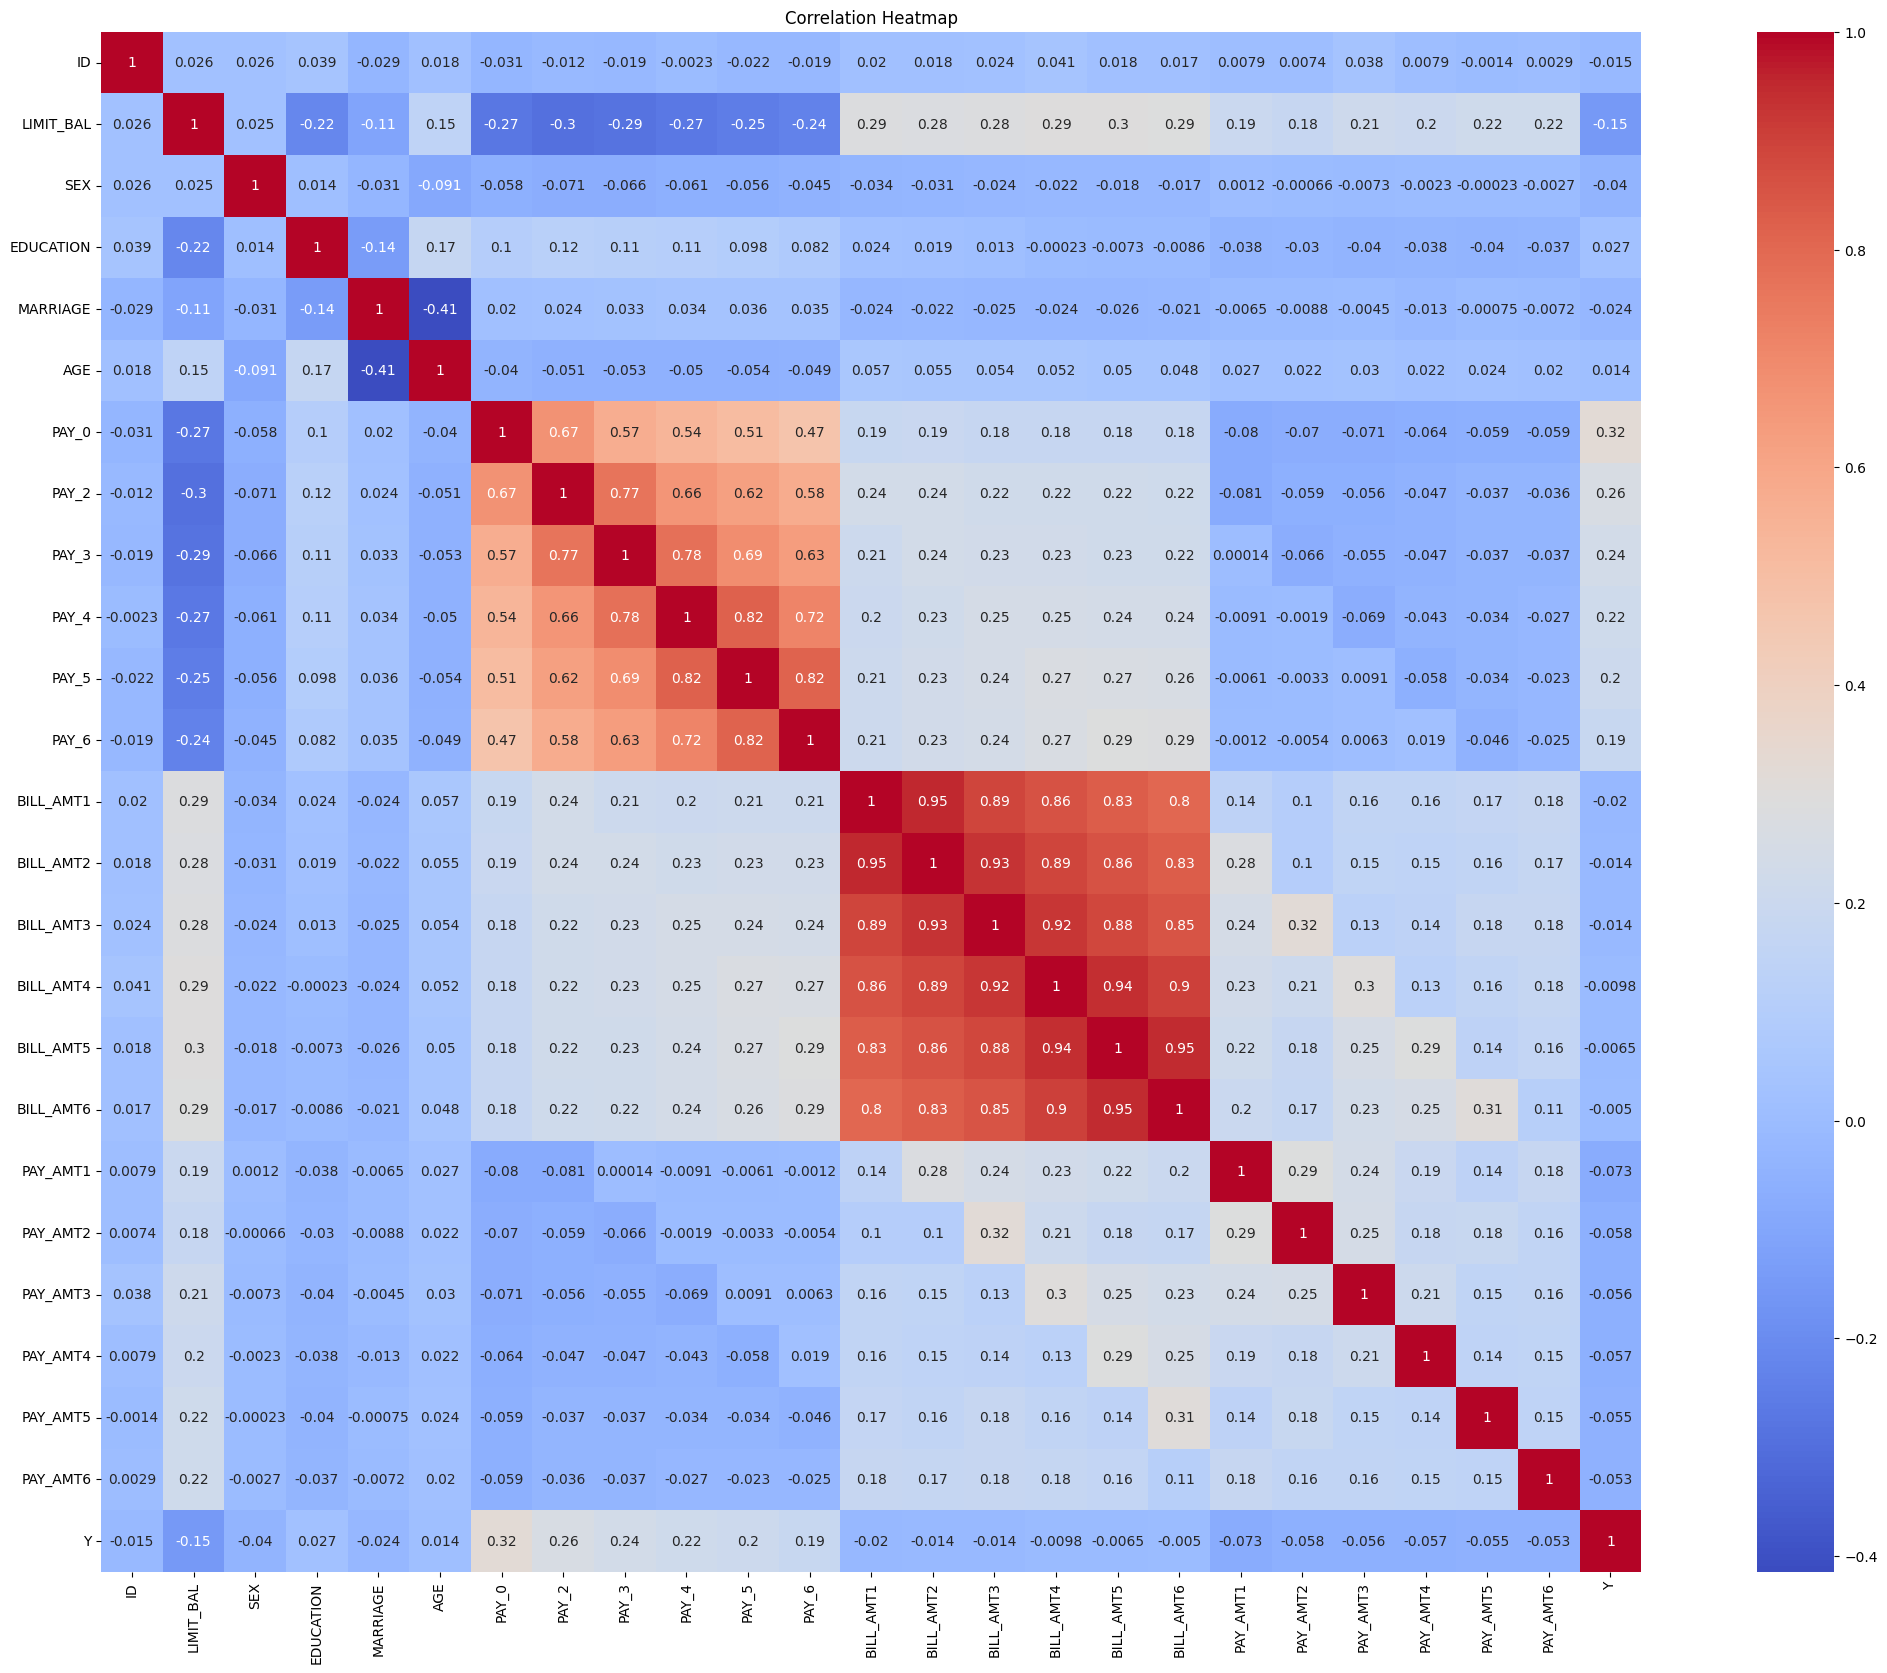

In [121]:
corr = np.corrcoef(df, rowvar=False)
plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, xticklabels=df.columns, yticklabels=df.columns)
plt.title("Correlation Heatmap")
plt.show()

In [122]:
# List out the top 30 positive correlation pairs of features
upper_tri = np.triu(corr, k=1) # Extract upper triangle of the correlation matrix
correlation_pairs = np.argwhere(upper_tri > 0) # Find indices of positive correlation pairs
sorted_pairs = sorted(correlation_pairs, key=lambda x: corr[x[0], x[1]], reverse=True) # Sort by correlation value
top_pairs = sorted_pairs[:30] # Select top 30 pairs

# Retrieve column names from dataframe
columns = df.columns

# Print out the top 30 positive correlation pairs of features with column names
print("Top 10 Positive Correlation Pairs of Features:")
for pair in top_pairs:
    feature1 = columns[pair[0]] # Retrieve column name for feature1
    feature2 = columns[pair[1]] # Retrieve column name for feature2
    correlation = corr[pair[0], pair[1]] # Retrieve correlation value
    print(f"Feature '{feature1}' and Feature '{feature2}': Correlation = {correlation:.3f}")

Top 10 Positive Correlation Pairs of Features:
Feature 'BILL_AMT1' and Feature 'BILL_AMT2': Correlation = 0.951
Feature 'BILL_AMT5' and Feature 'BILL_AMT6': Correlation = 0.946
Feature 'BILL_AMT4' and Feature 'BILL_AMT5': Correlation = 0.940
Feature 'BILL_AMT2' and Feature 'BILL_AMT3': Correlation = 0.929
Feature 'BILL_AMT3' and Feature 'BILL_AMT4': Correlation = 0.925
Feature 'BILL_AMT4' and Feature 'BILL_AMT6': Correlation = 0.901
Feature 'BILL_AMT2' and Feature 'BILL_AMT4': Correlation = 0.893
Feature 'BILL_AMT1' and Feature 'BILL_AMT3': Correlation = 0.892
Feature 'BILL_AMT3' and Feature 'BILL_AMT5': Correlation = 0.885
Feature 'BILL_AMT1' and Feature 'BILL_AMT4': Correlation = 0.861
Feature 'BILL_AMT2' and Feature 'BILL_AMT5': Correlation = 0.860
Feature 'BILL_AMT3' and Feature 'BILL_AMT6': Correlation = 0.854
Feature 'BILL_AMT2' and Feature 'BILL_AMT6': Correlation = 0.832
Feature 'BILL_AMT1' and Feature 'BILL_AMT5': Correlation = 0.830
Feature 'PAY_4' and Feature 'PAY_5': Correl

The variables within the "Amount of Bill Statement" (BILL_AMT) group exhibit high positive correlations, as do the variables within the "Repayment Statistics" (PAY) group. This may cause multiconlinearity when we run the model.


In [123]:
# Select the variables of interest (including the target variable)
pay.append('Y')
bill_amt.append('Y')


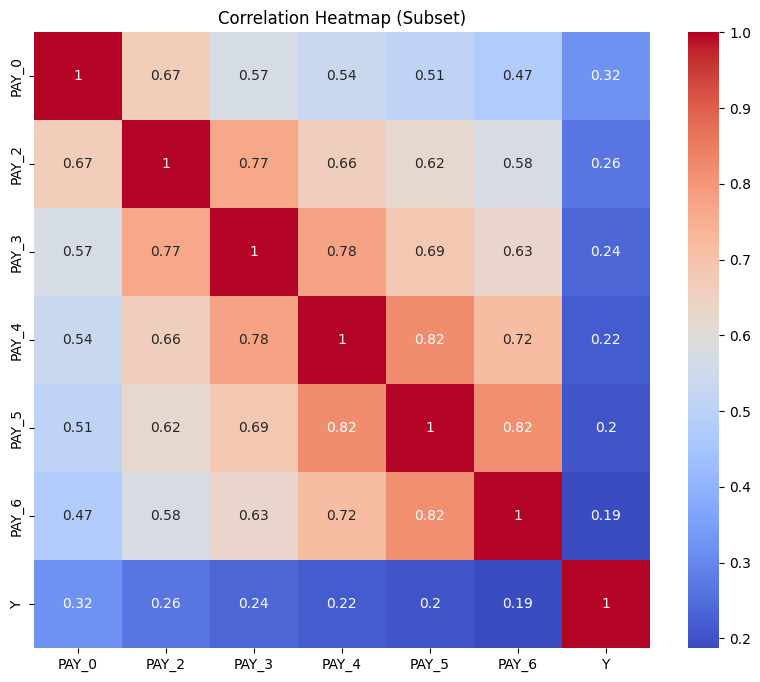

In [124]:
# Subset the correlation matrix to include only the selected variables
pay_subset = df[pay]

# Compute correlation matrix for the subset of variables
corr_subset = pay_subset.corr()

# Convert correlation matrix to 2-dimensional numpy array
corr_array = np.array(corr_subset)

# Create a heatmap of the correlation matrix for the subset of variables
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_array, annot=True, cmap="coolwarm", square=True, xticklabels=pay_subset.columns, yticklabels=pay_subset.columns)
plt.title("Correlation Heatmap (Subset)")
plt.show()

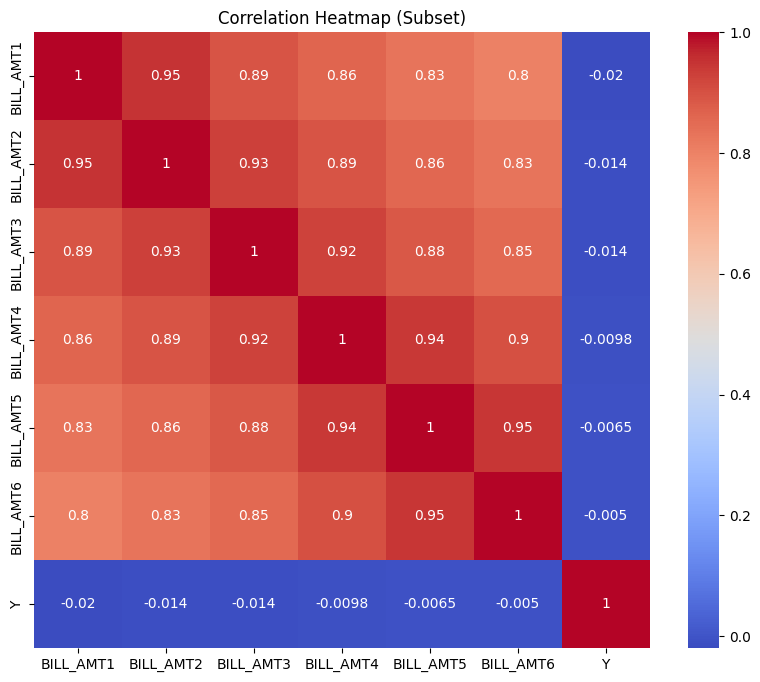

In [125]:
# Subset the correlation matrix to include only the selected variables
bill_amt_subset = df[bill_amt]

# Compute correlation matrix for the subset of variables
corr_subset = bill_amt_subset.corr()

# Convert correlation matrix to 2-dimensional numpy array
corr_array = np.array(corr_subset)

# Create a heatmap of the correlation matrix for the subset of variables
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_array, annot=True, cmap="coolwarm", square=True, xticklabels=bill_amt_subset.columns, yticklabels=bill_amt_subset.columns)
plt.title("Correlation Heatmap (Subset)")
plt.show()

We will first try the model with all features and later select the features with highest correlation with target variable

# Preprocessing

## Data Cleanning

In [126]:
# correct Pay_0 to Oay_1
#df.rename(columns = {'PAY_0':'PAY_1'},inplace = True)

# drop ID which is not useful in modelling
df = df.drop(['ID','SEX','MARRIAGE','EDUCATION','AGE'], axis =1)


## Feature Engineering

From EDA, we noted that there could be multicolinearity in Pay and Bill_Amt. Hence, we will only keep the highest variable in modelling

In [127]:
# drop high correlated features
df = df.drop(['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',], axis =1)

# Train Test Split

To avoid data leakage, we will split the dataset before running preprocessing. Data will be partitioned into 60% training and 20% validation and 20% testing

In [128]:
y = df['Y']
X = df.drop(['Y'],axis =1)


In [129]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1230000)
print("Train set shapes: X_train={}, y_train={}".format(X_train.shape, y_train.shape))
print("Test set shapes: X_test={}, y_test={}".format(X_test.shape, y_test.shape))

Train set shapes: X_train=(20929, 9), y_train=(20929,)
Test set shapes: X_test=(8970, 9), y_test=(8970,)


In [130]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

16302
4627


We found that number of default is much smaller than non default. Hence, we will do oversampling

## Oversampling

In [131]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# Oversample the data
ros = RandomOverSampler(sampling_strategy='minority') 
X_train, y_train = ros.fit_resample(X_train, y_train)

In [133]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

16302
16302


# Modelling

We will run below supervised learning model to test the accuracy:


*   Logistic Regression
*   kNN
*   Naive Bayes
*   SVC
*   Decision Tree
*   RandomForest
*   Neural Network







## Logistic Regression

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)


In [136]:
print(X.columns, lg_model.coef_)
lg_model.intercept_

Index(['LIMIT_BAL', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object') [[-0.07908227  0.68727286 -0.08905972 -0.15480777 -0.23860821 -0.06257069
  -0.06211708 -0.03423243 -0.07298677]]


array([-0.17854495])

In [137]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))


from sklearn import metrics
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      6987
           1       0.36      0.66      0.47      1983

    accuracy                           0.67      8970
   macro avg       0.62      0.67      0.61      8970
weighted avg       0.76      0.67      0.70      8970

[[4705 2282]
 [ 679 1304]]
0.6654914779056934


In [138]:
print(len(y_pred==1))
print(len(y_pred==0)) 

8970
8970


## kNN

In [139]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [140]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75      6987
           1       0.34      0.60      0.43      1983

    accuracy                           0.66      8970
   macro avg       0.60      0.64      0.59      8970
weighted avg       0.74      0.66      0.68      8970

[[4702 2285]
 [ 797 1186]]
0.6355238938447825


## Naive Bayes

In [141]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

## Decision Tree

In [142]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6987
           1       0.38      0.41      0.39      1983

    accuracy                           0.72      8970
   macro avg       0.60      0.61      0.61      8970
weighted avg       0.73      0.72      0.72      8970

[[5648 1339]
 [1169  814]]
0.6094237688449718


## Random Forest

In [143]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model = rf_model.fit(X_train , y_train)
from sklearn.model_selection import train_test_split
from sklearn import metrics
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6987
           1       0.56      0.44      0.49      1983

    accuracy                           0.80      8970
   macro avg       0.70      0.67      0.68      8970
weighted avg       0.78      0.80      0.79      8970

[[6298  689]
 [1118  865]]
0.6687980292771946


## Neural Network

In [144]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
  ax1.plot(history.history['loss'], label = 'loss')

  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crosssentropy')
  ax1.grid(True)
  ax1.legend()

  ax2.plot(history.history['accuracy'], label='accuracy')

  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()


  plt.show()

In [145]:
def create_nn_model(X_train, y_train, lr, epochs, batch_size):
  nn_model = keras.Sequential([
      layers.Dense(64, activation="relu"),      
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1, activation="sigmoid"),
  ])

  # Specify learning rate
  optimizer = RMSprop(learning_rate=lr)

  nn_model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
  )
  return nn_model, history



In [146]:
nn_model, history = create_nn_model(X_train, y_train, 0.001, 20, 64)

Epoch 1/20
510/510 [==============================] - 2s 2ms/step - loss: 0.5853 - accuracy: 0.6911
Epoch 2/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5712 - accuracy: 0.7007
Epoch 3/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5680 - accuracy: 0.6990
Epoch 4/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5641 - accuracy: 0.7028
Epoch 5/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5606 - accuracy: 0.7034
Epoch 6/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5569 - accuracy: 0.7052
Epoch 7/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7069
Epoch 8/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5523 - accuracy: 0.7073
Epoch 9/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.7110
Epoch 10/20
510/510 [==============================] - 1s 2ms/step - loss: 0.5450 - accuracy: 0.7100

In [147]:
results = nn_model.evaluate(X_test, y_test)

281/281 [==============================] - 1s 2ms/step - loss: 0.5875 - accuracy: 0.7074


In [148]:
y_pred_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred_nn))
print(confusion_matrix(y_test,y_pred))
print(metrics.roc_auc_score(y_test,y_pred))

281/281 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      6987
           1       0.40      0.66      0.50      1983

    accuracy                           0.71      8970
   macro avg       0.64      0.69      0.65      8970
weighted avg       0.77      0.71      0.73      8970

[[6298  689]
 [1118  865]]
0.6687980292771946
